In [ ]:
  # For Google Drive files
  from google.colab import drive
  drive.mount('/content/drive')
  """
    The datset is taken from UCL Repository that describes telecom company's database over a period of 12 months. It has a total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attributes that are in this dataset
    are call failures, frequency of SMS, number of complaints, number of distinct calls, subscription length, age group, the charge amount, type of service, seconds of use, status, frequency of use, and Customer Value.
  """

Mounted at /content/drive


### Data Pre-processing

(3150, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1)

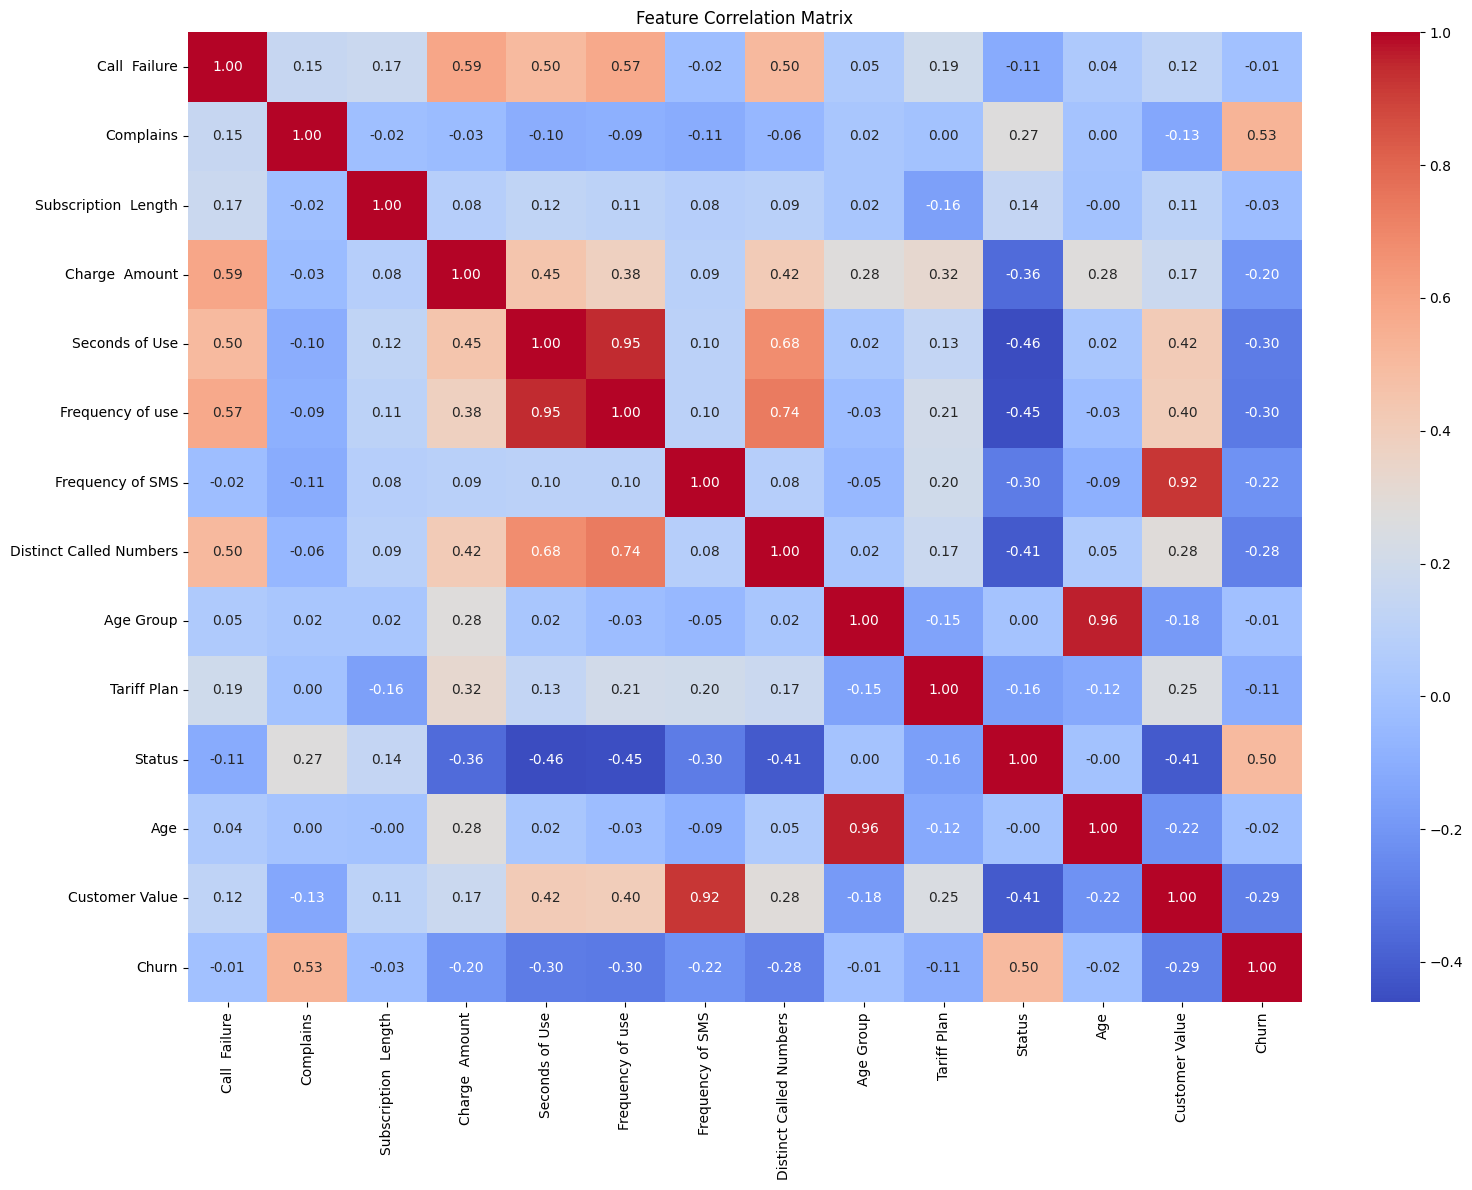

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# load data
file_path = "/content/drive/MyDrive/Telecommunication_dataset.csv"
data = pd.read_csv(file_path)

# display data information
print(data.shape)
print(data.info())
print(data.describe())

# check for missing values
print(data.isnull().sum())

# check class distribution
print(data['Churn'].value_counts())
print(data['Churn'].value_counts(normalize=True))

# visualize correlations
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


In [ ]:
# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Scikit-learn Logistic Regression Model

Logistic Regression Results:
Accuracy: 0.8968
ROC AUC: 0.9208

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       531
           1       0.84      0.42      0.56        99

    accuracy                           0.90       630
   macro avg       0.87      0.70      0.75       630
weighted avg       0.89      0.90      0.88       630



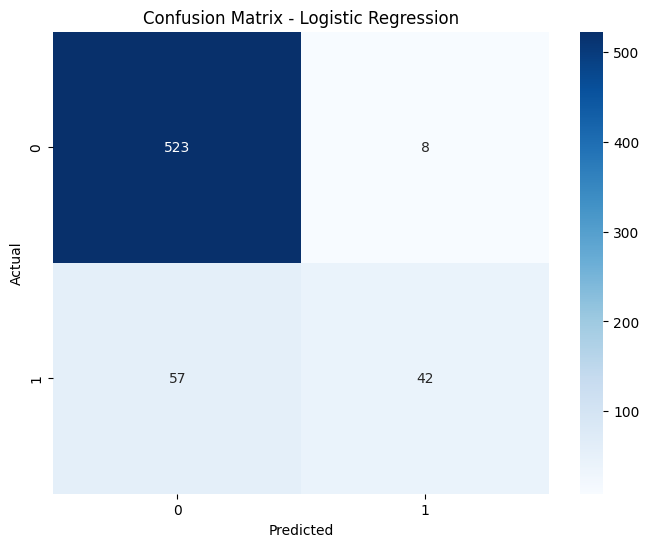

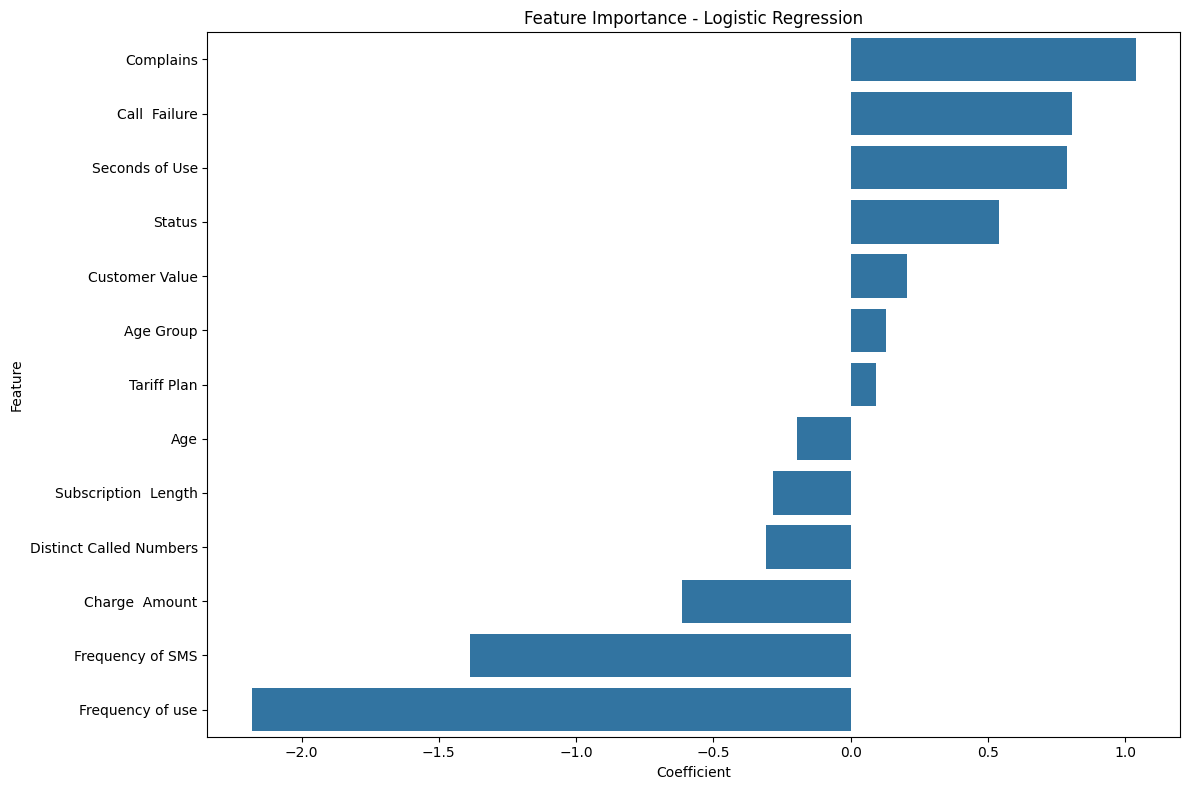

In [ ]:
# Train logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000, C=1.0)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Visualize feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance - Logistic Regression')
plt.tight_layout()
plt.show()

## PyTorch Neural Network Model with Sigmoid Activation

Epoch [10/100], Train Loss: 0.1799, Test Loss: 0.1758
Epoch [20/100], Train Loss: 0.1372, Test Loss: 0.1303
Epoch [30/100], Train Loss: 0.1190, Test Loss: 0.1228
Epoch [40/100], Train Loss: 0.1089, Test Loss: 0.1106
Epoch [50/100], Train Loss: 0.1050, Test Loss: 0.1101
Epoch [60/100], Train Loss: 0.0874, Test Loss: 0.1065
Epoch [70/100], Train Loss: 0.0926, Test Loss: 0.1105
Epoch [80/100], Train Loss: 0.0833, Test Loss: 0.1087
Epoch [90/100], Train Loss: 0.0784, Test Loss: 0.1143
Epoch [100/100], Train Loss: 0.0785, Test Loss: 0.1045


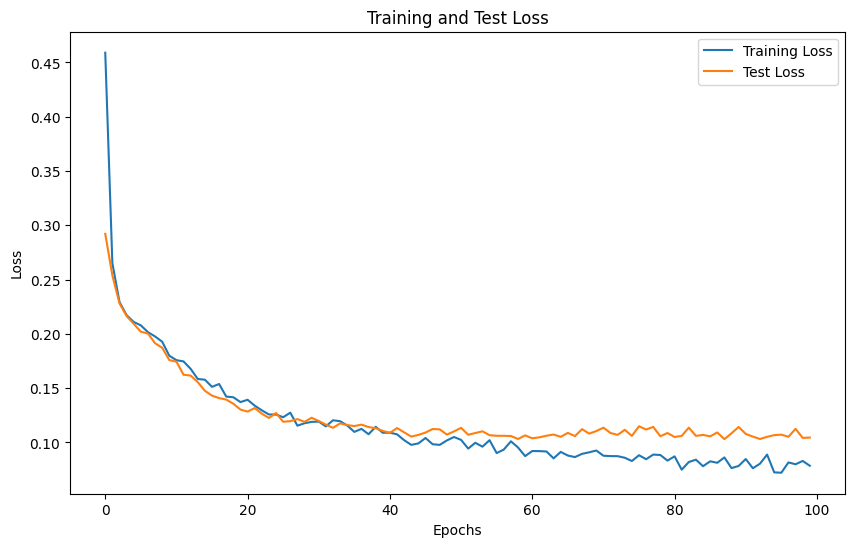


Neural Network Results:
Accuracy: 0.9635
ROC AUC: 0.9896

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       531
           1       0.95      0.81      0.87        99

    accuracy                           0.96       630
   macro avg       0.96      0.90      0.93       630
weighted avg       0.96      0.96      0.96       630



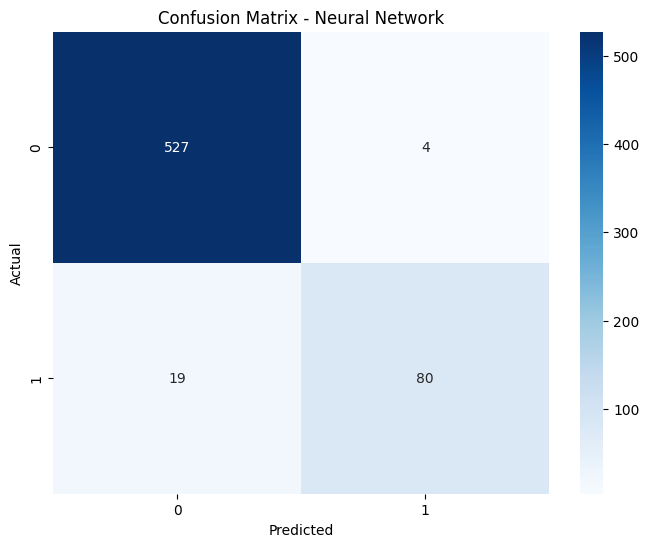

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.FloatTensor(y_train.values)
y_test_tensor = torch.FloatTensor(y_test.values)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define the neural network architecture
class ChurnNN(nn.Module):
    def __init__(self, input_dim):
        super(ChurnNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.dropout(x)
        x = self.relu(self.layer3(x))
        x = self.sigmoid(self.output(x))  # Using sigmoid for binary classification
        return x

# Initialize the model
input_dim = X_train_scaled.shape[1]
model = ChurnNN(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 100
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for inputs, targets in train_loader:
        # Forward pass
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    # Evaluate on test set
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs).squeeze()
            test_loss += criterion(outputs, targets).item()

    test_losses.append(test_loss / len(test_loader))

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')

# Plot training and test loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Evaluate the neural network model
model.eval()
with torch.no_grad():
    y_pred_proba = model(X_test_tensor).squeeze().numpy()
    y_pred_nn = (y_pred_proba >= 0.5).astype(int)

# Calculate metrics
print("\nNeural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network')
plt.show()

### Model Comparison

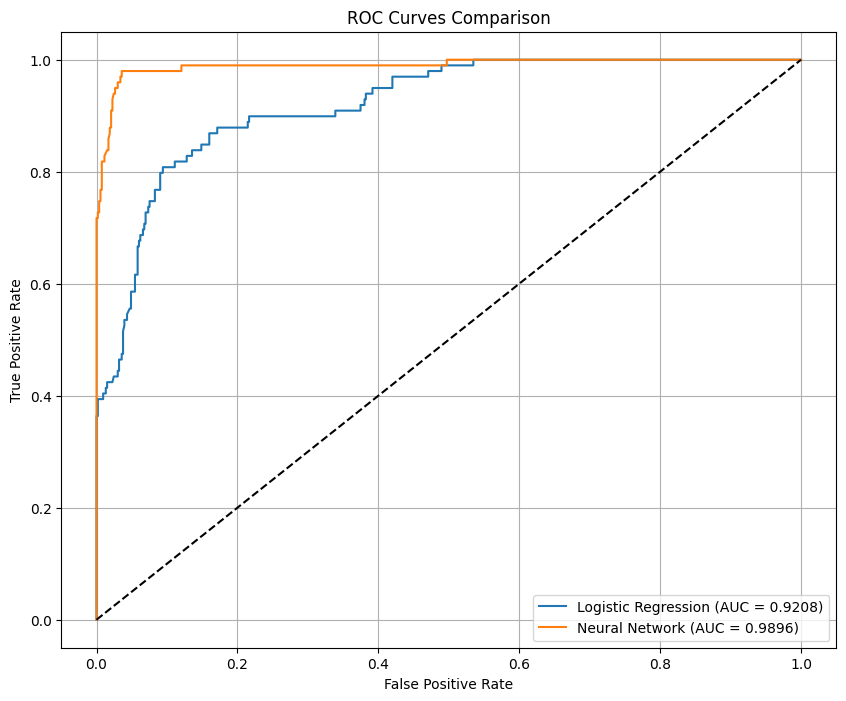


Model Performance Comparison:
                 Model  Accuracy   ROC AUC precision_0  recall_0 f1-score_0  \
0  Logistic Regression  0.896825  0.920790    0.901724  0.984934   0.941494   
1       Neural Network  0.963492  0.989614    0.965201  0.992467   0.978644   

  precision_1  recall_1 f1-score_1  
0        0.84  0.424242   0.563758  
1    0.952381  0.808081   0.874317  


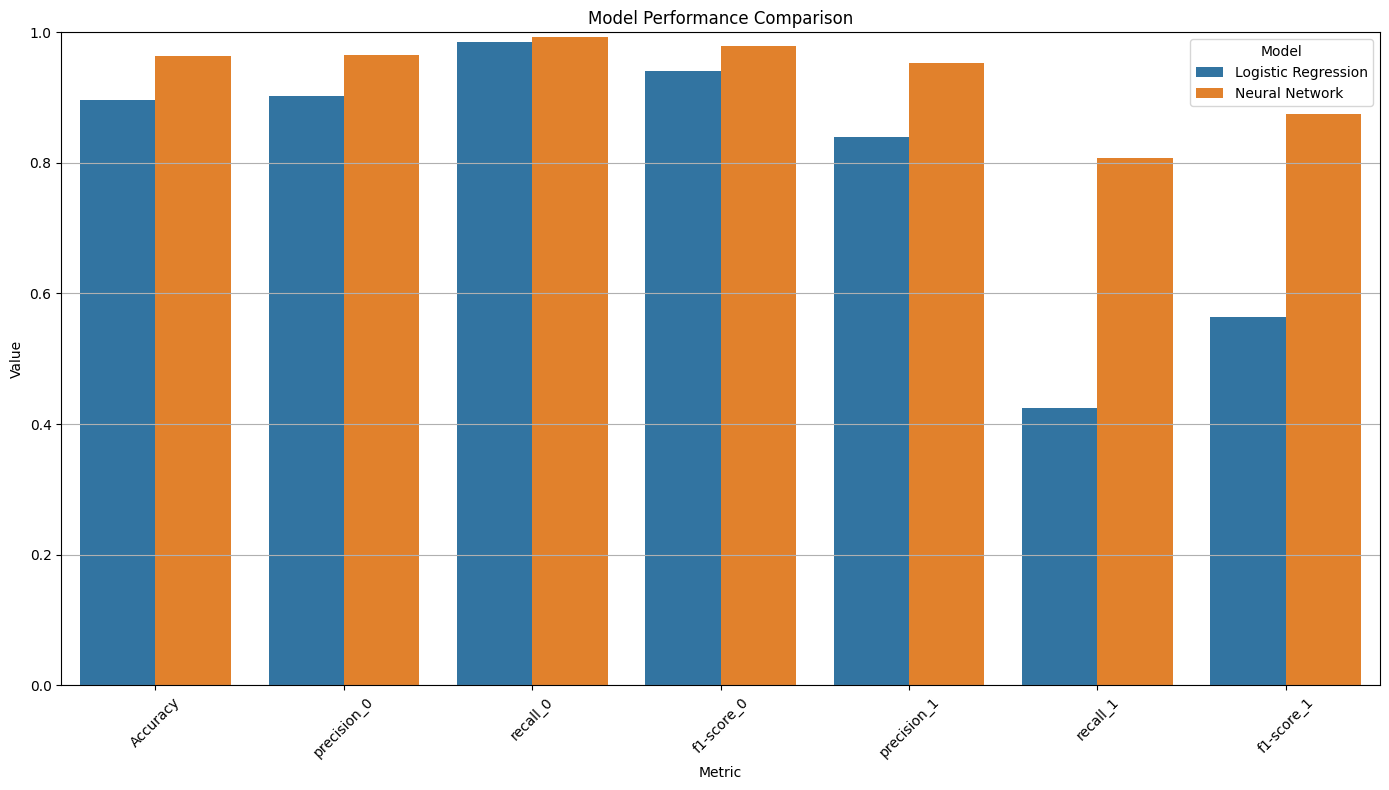

In [ ]:
# Compare ROC curves
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 8))

# ROC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.4f})')

# ROC for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Compare metrics
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Neural Network'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_nn)],
    'ROC AUC': [roc_auc_score(y_test, y_prob_lr), roc_auc_score(y_test, y_pred_proba)]
})

# Add precision, recall, and F1 score for both classes
for model_idx, (y_pred, name) in enumerate([(y_pred_lr, 'Logistic Regression'), (y_pred_nn, 'Neural Network')]):
    report = classification_report(y_test, y_pred, output_dict=True)
    for class_idx in ['0', '1']:
        for metric in ['precision', 'recall', 'f1-score']:
            col_name = f'{metric}_{class_idx}'
            if col_name not in metrics_df.columns:
                metrics_df[col_name] = None
            metrics_df.loc[model_idx, col_name] = report[class_idx][metric]

print("\nModel Performance Comparison:")
print(metrics_df)

# Visualization of accuracy, precision, recall and F1-score
metrics_to_plot = ['Accuracy', 'precision_0', 'recall_0', 'f1-score_0', 'precision_1', 'recall_1', 'f1-score_1']
metrics_df_long = pd.melt(metrics_df, id_vars=['Model'], value_vars=metrics_to_plot,
                         var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_df_long)
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Class Imbalances scenarios


Class Distribution in Training Data:
Churn
0    0.842857
1    0.157143
Name: proportion, dtype: float64

Analyzing impact of class imbalance...

Performance with Class Imbalance Handling:
                          Model  Accuracy   ROC AUC precision_minority  \
0           Logistic Regression  0.896825  0.920790               0.84   
1  Weighted Logistic Regression  0.841270  0.924309           0.497076   
2                Neural Network  0.963492  0.989614           0.952381   

  recall_minority f1-score_minority  
0        0.424242          0.563758  
1        0.858586           0.62963  
2        0.808081          0.874317  


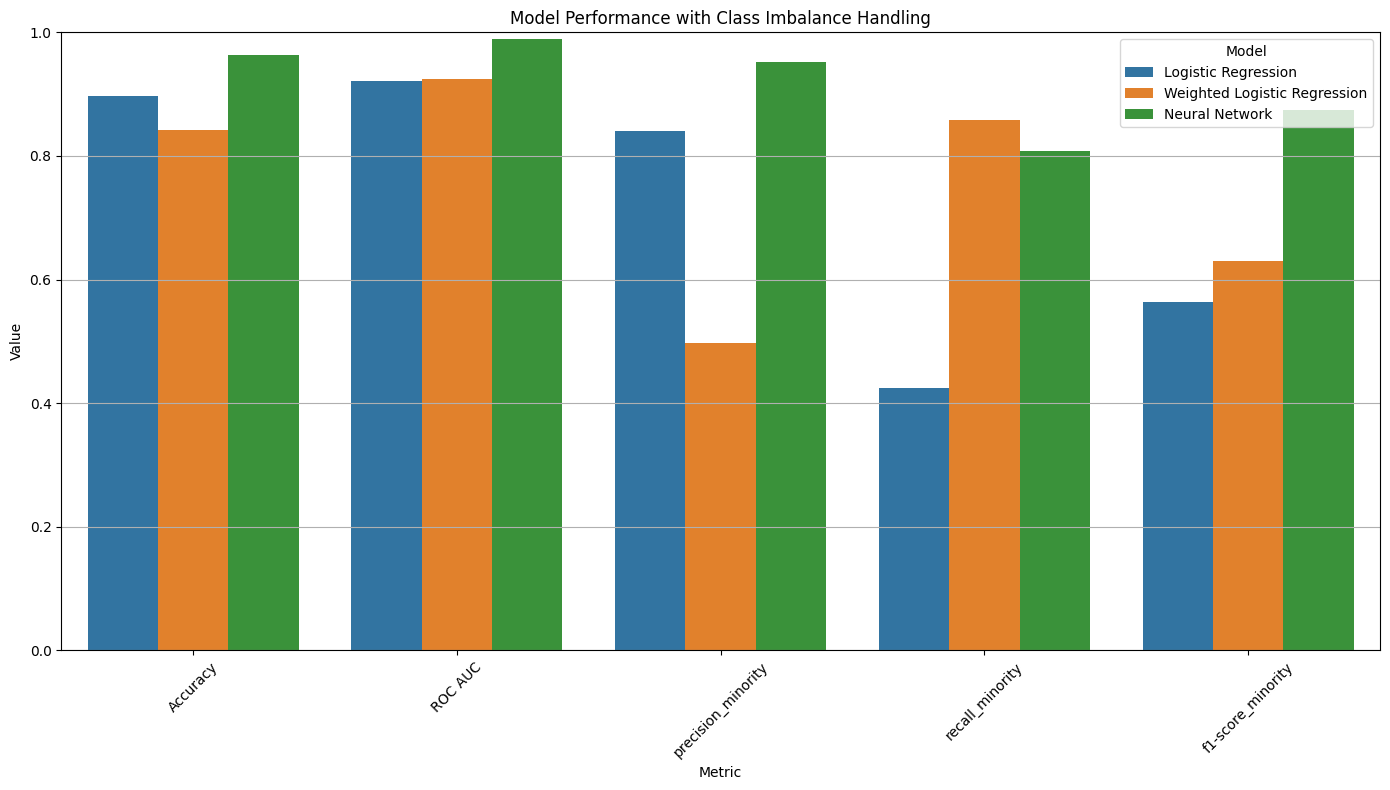

In [ ]:
# Check class distribution
class_distribution = y_train.value_counts(normalize=True)
print("\nClass Distribution in Training Data:")
print(class_distribution)

# If there's class imbalance, let's analyze how it affects our metrics
if min(class_distribution) < 0.4:  # Arbitrary threshold for imbalance
    print("\nAnalyzing impact of class imbalance...")

    # Compute class weights for logistic regression
    from sklearn.utils.class_weight import compute_class_weight
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

    # Train a weighted logistic regression model
    log_reg_weighted = LogisticRegression(random_state=42, max_iter=1000, C=1.0, class_weight='balanced')
    log_reg_weighted.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_lr_weighted = log_reg_weighted.predict(X_test_scaled)
    y_prob_lr_weighted = log_reg_weighted.predict_proba(X_test_scaled)[:, 1]

    # Compare original vs weighted models
    balanced_metrics_df = pd.DataFrame({
        'Model': ['Logistic Regression', 'Weighted Logistic Regression', 'Neural Network'],
        'Accuracy': [
            accuracy_score(y_test, y_pred_lr),
            accuracy_score(y_test, y_pred_lr_weighted),
            accuracy_score(y_test, y_pred_nn)
        ],
        'ROC AUC': [
            roc_auc_score(y_test, y_prob_lr),
            roc_auc_score(y_test, y_prob_lr_weighted),
            roc_auc_score(y_test, y_pred_proba)
        ]
    })

    # Add precision, recall, and F1 score for the minority class
    minority_class = class_distribution.idxmin()
    for model_idx, (y_pred, y_prob, name) in enumerate([
        (y_pred_lr, y_prob_lr, 'Logistic Regression'),
        (y_pred_lr_weighted, y_prob_lr_weighted, 'Weighted Logistic Regression'),
        (y_pred_nn, y_pred_proba, 'Neural Network')
    ]):
        report = classification_report(y_test, y_pred, output_dict=True)
        for metric in ['precision', 'recall', 'f1-score']:
            col_name = f'{metric}_minority'
            if col_name not in balanced_metrics_df.columns:
                balanced_metrics_df[col_name] = None
            balanced_metrics_df.loc[model_idx, col_name] = report[str(minority_class)][metric]

    print("\nPerformance with Class Imbalance Handling:")
    print(balanced_metrics_df)

    # Visualization
    metrics_to_plot = ['Accuracy', 'ROC AUC', 'precision_minority', 'recall_minority', 'f1-score_minority']
    balanced_df_long = pd.melt(balanced_metrics_df, id_vars=['Model'], value_vars=metrics_to_plot,
                             var_name='Metric', value_name='Value')

    plt.figure(figsize=(14, 8))
    sns.barplot(x='Metric', y='Value', hue='Model', data=balanced_df_long)
    plt.title('Model Performance with Class Imbalance Handling')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

## C Parameter in Logistic Regression


Logistic Regression Performance with Different C Values:
        C  Accuracy   ROC AUC  Precision (Class 0)  Recall (Class 0)  \
0    0.01  0.898413  0.914132             0.892437          1.000000   
1    0.10  0.895238  0.917613             0.900172          0.984934   
2    1.00  0.896825  0.920790             0.901724          0.984934   
3   10.00  0.893651  0.924024             0.900000          0.983051   
4  100.00  0.890476  0.924499             0.899654          0.979284   

   F1 (Class 0)  Precision (Class 1)  Recall (Class 1)  F1 (Class 1)  
0      0.943162             1.000000          0.353535      0.522388  
1      0.940647             0.836735          0.414141      0.554054  
2      0.941494             0.840000          0.424242      0.563758  
3      0.939694             0.820000          0.414141      0.550336  
4      0.937782             0.788462          0.414141      0.543046  


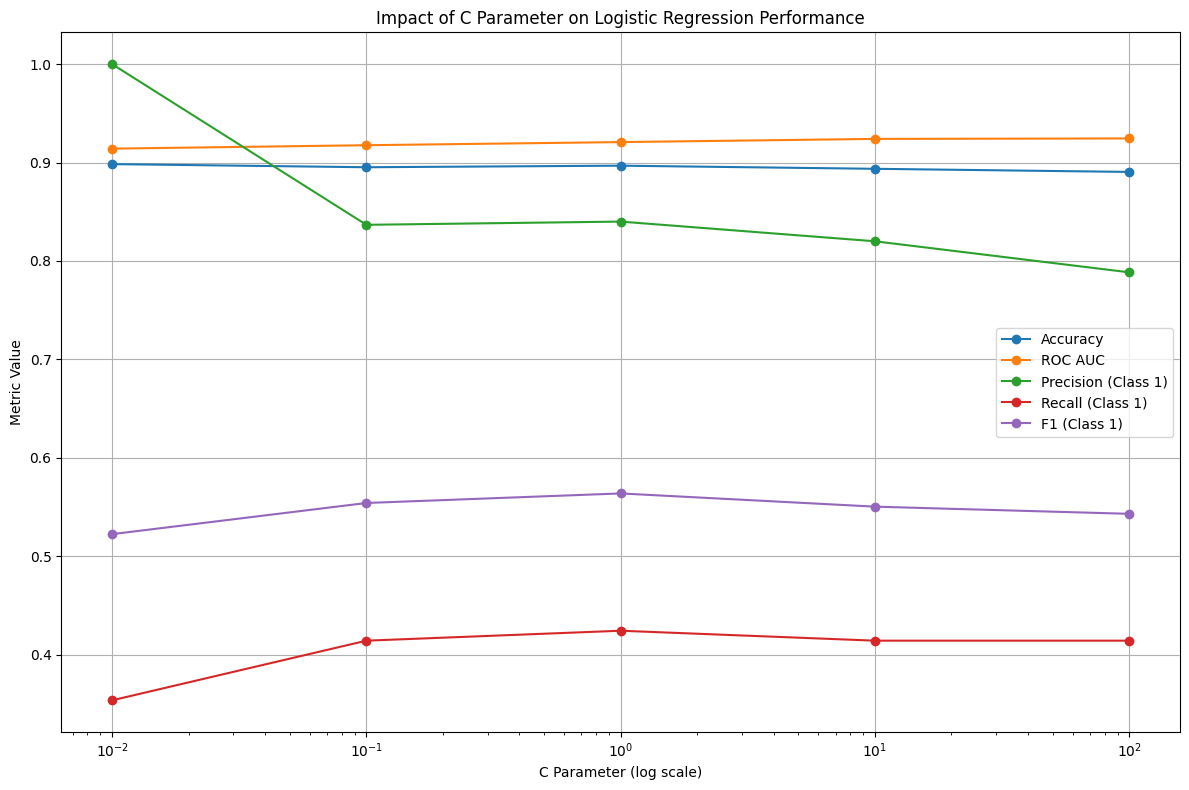

In [ ]:
# Test different C values for logistic regression
c_values = [0.01, 0.1, 1, 10, 100]
c_results = []

for c in c_values:
    # Train logistic regression with different C values
    log_reg_c = LogisticRegression(random_state=42, max_iter=1000, C=c)
    log_reg_c.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_c = log_reg_c.predict(X_test_scaled)
    y_prob_c = log_reg_c.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_c)
    roc_auc = roc_auc_score(y_test, y_prob_c)
    report = classification_report(y_test, y_pred_c, output_dict=True)

    # Store results
    c_results.append({
        'C': c,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Precision (Class 0)': report['0']['precision'],
        'Recall (Class 0)': report['0']['recall'],
        'F1 (Class 0)': report['0']['f1-score'],
        'Precision (Class 1)': report['1']['precision'],
        'Recall (Class 1)': report['1']['recall'],
        'F1 (Class 1)': report['1']['f1-score']
    })

# Create DataFrame from results
c_df = pd.DataFrame(c_results)
print("\nLogistic Regression Performance with Different C Values:")
print(c_df)

# Plot how metrics change with C values
plt.figure(figsize=(12, 8))
metrics_to_plot = ['Accuracy', 'ROC AUC', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 (Class 1)']
c_df_long = pd.melt(c_df, id_vars=['C'], value_vars=metrics_to_plot,
                   var_name='Metric', value_name='Value')

for metric in metrics_to_plot:
    plt.plot(c_df['C'], c_df[metric], marker='o', label=metric)

plt.xscale('log')
plt.xlabel('C Parameter (log scale)')
plt.ylabel('Metric Value')
plt.title('Impact of C Parameter on Logistic Regression Performance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()